In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("CarPrice_Assignment.csv")
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


Analyzing data

In [4]:
df.describe()

,car_ID,symboling,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,103.000000,0.834146,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,59.322565,1.245307,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,1.000000,-2.000000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,52.000000,0.000000,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,103.000000,1.000000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,154.000000,2.000000,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,205.000000,3.000000,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [5]:
print(df['aspiration'].unique())
print(df['doornumber'].unique())
print(df['carbody'].unique())
print(df['drivewheel'].unique())
print(df['enginelocation'].unique())
print(df['enginetype'].unique())
print(df['cylindernumber'].unique())
print(df['fuelsystem'].unique())

['std' 'turbo']
['two' 'four']
['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']
['rwd' 'fwd' '4wd']
['front' 'rear']
['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf' 'dohcv']
['four' 'six' 'five' 'three' 'twelve' 'two' 'eight']
['mpfi' '2bbl' 'mfi' '1bbl' 'spfi' '4bbl' 'idi' 'spdi']


Converting non numeric to numeric

In [6]:
# --- Binary features ---
# These can be converted to 0/1 directly
binary_cols = ['fueltype','aspiration', 'doornumber', 'enginelocation']

# Mapping binary features manually
binary_mappings = {
    'fueltype':{'gas':1, 'diesel':0},
    'aspiration': {'std': 0, 'turbo': 1},
    'doornumber': {'two': 0, 'four': 1},
    'enginelocation': {'front': 0, 'rear': 1}
}

for col in binary_cols:
    df[col] = df[col].map(binary_mappings[col])  # Convert binary to 0/1

# --- Ordinal feature ---
# Assuming more cylinders generally increase car performance/price
# So we can map them to ordinal integers
cylinder_mapping = {
    'two': 2,
    'three': 3,
    'four': 4,
    'five': 5,
    'six': 6,
    'eight': 8,
    'twelve': 12
}
df['cylindernumber'] = df['cylindernumber'].map(cylinder_mapping)

# --- One-hot encoding features ---
# List of columns to one-hot encode
one_hot_cols = ['carbody', 'drivewheel', 'enginetype', 'fuelsystem']

for col in one_hot_cols:
    # Create dummies with prefix = column name
    dummies = pd.get_dummies(df[col], prefix=col, dtype='int8')
    
    # Drop the first column to avoid dummy variable trap
    dummies = dummies.iloc[:, 1:]
    
    # Merge dummies with original df
    df = pd.concat([df, dummies], axis=1)
    
    # Drop original column
    df.drop(col, axis=1, inplace=True)

df.drop(['CarName','car_ID'], axis=1, inplace=True)
df.head()


,symboling,fueltype,aspiration,doornumber,enginelocation,wheelbase,carlength,carwidth,carheight,curbweight,...,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_idi,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi
0,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
1,3,1,0,0,0,88.6,168.8,64.1,48.8,2548,...,0,0,0,0,0,0,0,1,0,0
2,1,1,0,0,0,94.5,171.2,65.5,52.4,2823,...,0,1,0,0,0,0,0,1,0,0
3,2,1,0,1,0,99.8,176.6,66.2,54.3,2337,...,0,0,0,0,0,0,0,1,0,0
4,2,1,0,1,0,99.4,176.6,66.4,54.3,2824,...,0,0,0,0,0,0,0,1,0,0


In [7]:
corr_matrix = df.corr()
print(corr_matrix)

                   symboling  fueltype  aspiration  doornumber  \
symboling           1.000000  0.194311   -0.059866   -0.664073   
fueltype            0.194311  1.000000   -0.401397   -0.191491   
aspiration         -0.059866 -0.401397    1.000000    0.031792   
doornumber         -0.664073 -0.191491    0.031792    1.000000   
enginelocation      0.212471  0.040070   -0.057191   -0.137757   
wheelbase          -0.531954 -0.308346    0.257611    0.447357   
carlength          -0.357612 -0.212679    0.234539    0.398568   
carwidth           -0.232919 -0.233880    0.300567    0.207168   
carheight          -0.541038 -0.284631    0.087311    0.552208   
curbweight         -0.227691 -0.217275    0.324902    0.197379   
cylindernumber     -0.113129  0.024544   -0.047972   -0.016009   
enginesize         -0.105790 -0.069594    0.108217    0.020742   
boreratio          -0.130051 -0.054451    0.212614    0.119258   
stroke             -0.008735 -0.241829    0.222982   -0.011082   
compressio

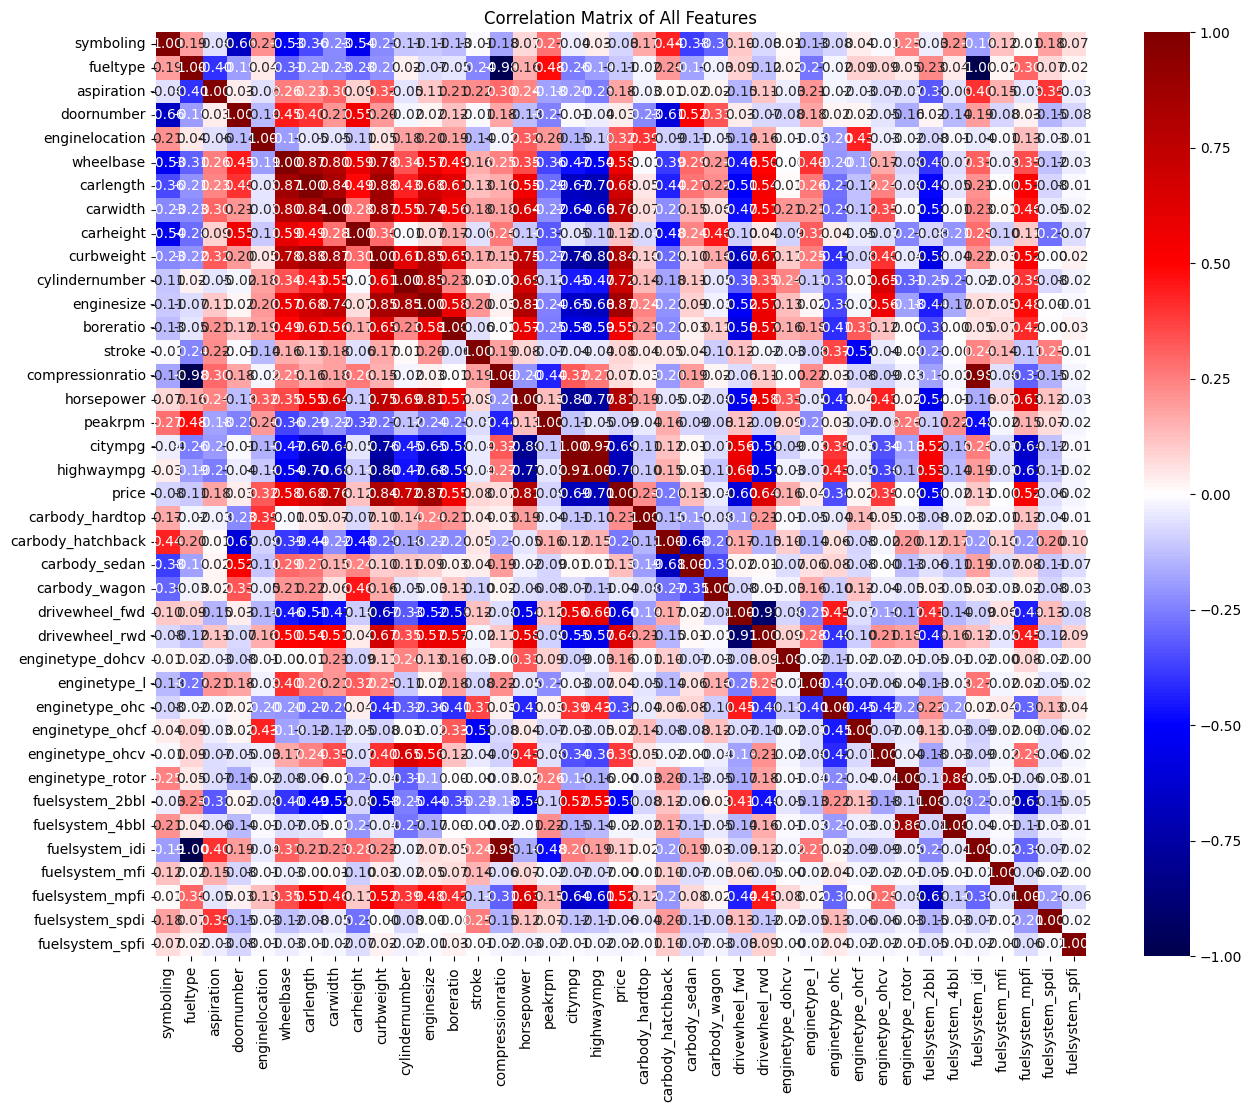

In [8]:
# --- Compute correlation matrix ---
corr_matrix = df.corr()

# --- Display heatmap emphasizing strong correlations (both negative and positive) ---
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="seismic", center=0, vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix of All Features")
plt.show()


from the above we can see strong correlation 
# 1. fueltype vs fuelsystem_idi (-1) → drop one (fuelsystem_idi)
# 2. fueltype vs compressionratio (-0.984) → keep compressionratio, drop fueltype
# 3. carlength vs wheelbase (0.875) → drop carlength
# 4. carlength vs curbweight (0.878) → drop carlength
# 5. curbweight vs carwidth (0.867) → consider keeping only one
# 6. citympg vs highwaympg (~0.95) → drop citympg
# 7. fuelsystem_4bbl vs enginetype_rotor (0.863) → drop one
# 8. compressionratio vs fuelsystem_idi (0.984) → already handled


In [9]:
#dealing with multicollinearity

# Create cardensity
df['cardensity'] = df['curbweight'] / (df['carlength'] * df['carwidth'] * df['carheight'])
# Keep only cardensity and wheelbase
df = df.drop(['curbweight','carlength','carwidth','carheight'], axis=1)

#compression ratio 
df = df.drop(['fueltype', 'fuelsystem_idi'], axis=1)

# Drop citympg since it's highly correlated with highwaympg
df = df.drop(['citympg'], axis=1)


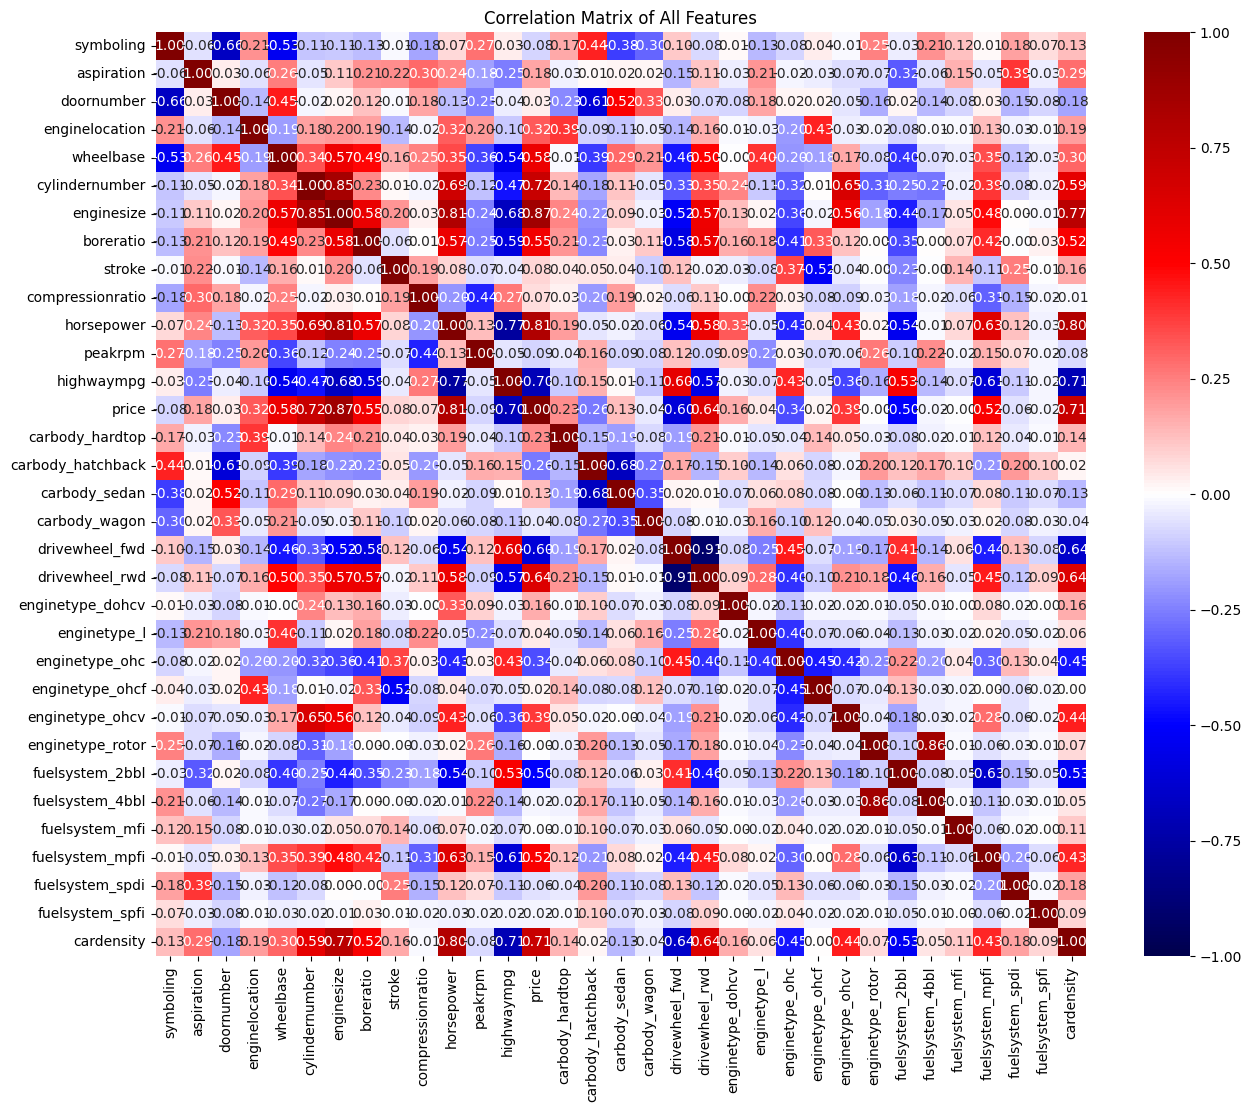

In [10]:
# --- Compute correlation matrix ---
corr_matrix = df.corr()

# --- Display heatmap emphasizing strong correlations (both negative and positive) ---
plt.figure(figsize=(15,12))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="seismic", center=0, vmin=-1, vmax=1, cbar=True)
plt.title("Correlation Matrix of All Features")
plt.show()


In [11]:
pd.set_option('display.max_columns', None)
df.describe()

,symboling,aspiration,doornumber,enginelocation,wheelbase,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cardensity
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,0.834146,0.180488,0.560976,0.014634,98.756585,4.380488,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,30.751220,13276.710571,0.039024,0.341463,0.468293,0.121951,0.585366,0.370732,0.004878,0.058537,0.721951,0.073171,0.063415,0.019512,0.321951,0.014634,0.004878,0.458537,0.043902,0.004878,0.004111
std,1.245307,0.385535,0.497483,0.120377,6.021776,1.080854,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.886443,7988.852332,0.194127,0.475361,0.500215,0.328031,0.493865,0.484183,0.069843,0.235330,0.449134,0.261054,0.244304,0.138655,0.468368,0.120377,0.069843,0.499498,0.205380,0.069843,0.000505
min,-2.000000,0.000000,0.000000,0.000000,86.600000,2.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,16.000000,5118.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003287
25%,0.000000,0.000000,0.000000,0.000000,94.500000,4.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,25.000000,7788.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.003724
50%,1.000000,0.000000,1.000000,0.000000,97.000000,4.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,30.000000,10295.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004012
75%,2.000000,0.000000,1.000000,0.000000,102.400000,4.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,34.000000,16503.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.004377
max,3.000000,1.000000,1.000000,1.000000,120.900000,12.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,54.000000,45400.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.006106


In [12]:
# --- Feature Scaling (Standardization) ---
# Select continuous numeric features to scale
cols_to_scale = [
    'wheelbase', 'enginesize', 'boreratio', 'stroke',
    'compressionratio', 'horsepower', 'peakrpm',
    'highwaympg', 'cardensity'
]

# Apply z-score standardization
df[cols_to_scale] = (df[cols_to_scale] - df[cols_to_scale].mean()) / df[cols_to_scale].std()
df

,symboling,aspiration,doornumber,enginelocation,wheelbase,cylindernumber,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,highwaympg,price,carbody_hardtop,carbody_hatchback,carbody_sedan,carbody_wagon,drivewheel_fwd,drivewheel_rwd,enginetype_dohcv,enginetype_l,enginetype_ohc,enginetype_ohcf,enginetype_ohcv,enginetype_rotor,fuelsystem_2bbl,fuelsystem_4bbl,fuelsystem_mfi,fuelsystem_mpfi,fuelsystem_spdi,fuelsystem_spfi,cardensity
0,3,0,0,0,-1.686643,4,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.544725,13495.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.415255
1,3,0,0,0,-1.686643,4,0.074267,0.517804,-1.834886,-0.287645,0.174057,-0.262318,-0.544725,16500.0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,1.415255
2,1,0,0,0,-0.706865,6,0.602571,-2.399008,0.684271,-0.287645,1.261448,-0.262318,-0.689938,16500.0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,1.373218
3,2,0,1,0,0.173274,4,-0.430023,-0.516003,0.461055,-0.035885,-0.053537,0.785932,-0.109087,13950.0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,-0.850658
4,2,0,1,0,0.106848,5,0.218350,-0.516003,0.461055,-0.539405,0.275209,0.785932,-1.270789,17450.0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0.642031
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,0,1,0,1.717669,4,0.338419,1.662375,-0.336147,-0.161765,0.249921,0.576282,-0.399512,16845.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,-0.043700
201,-1,1,1,0,1.717669,4,0.338419,1.662375,-0.336147,-0.363173,1.413178,0.366632,-0.835151,19045.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0.234528
202,-1,0,1,0,1.717669,6,1.106861,0.923942,-1.229012,-0.337997,0.755685,0.785932,-1.125577,21485.0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0.120881
203,-1,1,1,0,1.717669,6,0.434474,-1.180593,0.461055,3.236992,0.047616,-0.681618,-0.544725,22470.0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0.683198


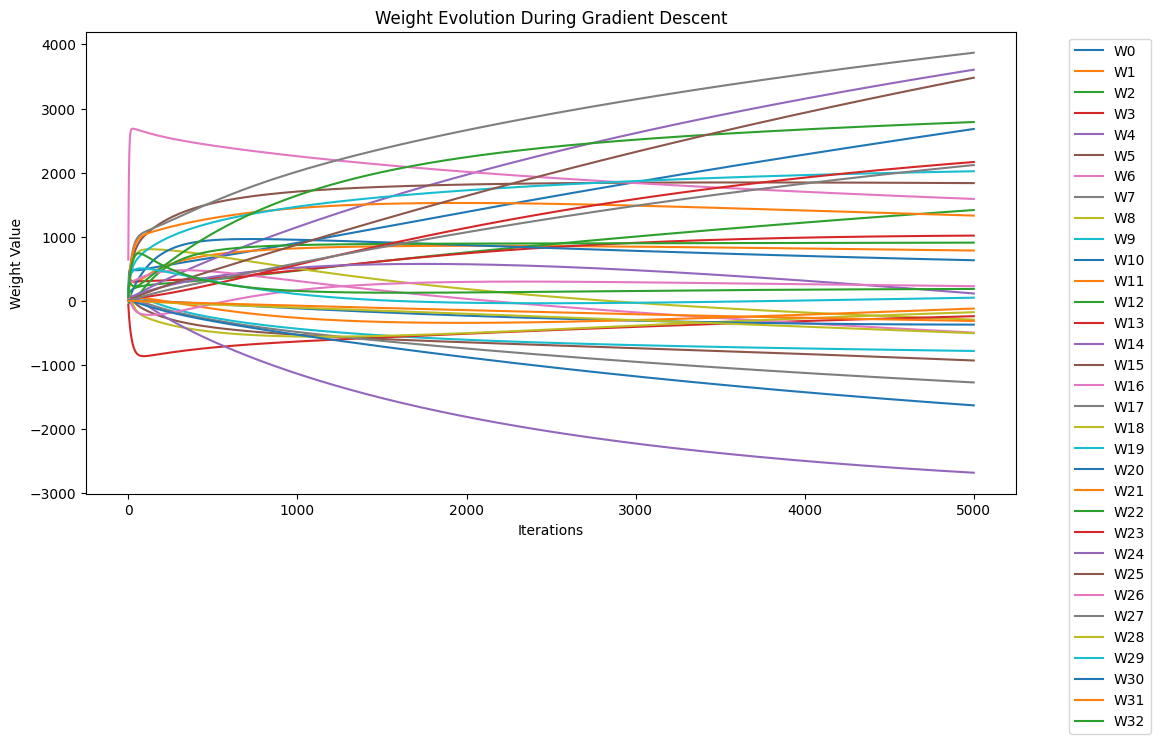

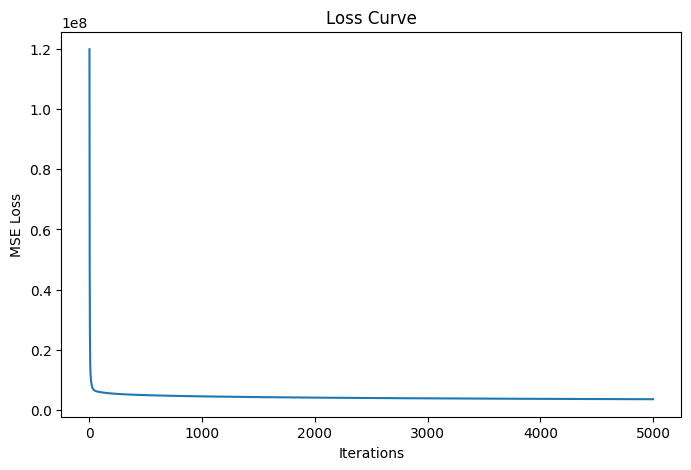

,weight
bias,2680.582422
symboling,785.190043
aspiration,1417.125750
doornumber,1018.118910
enginelocation,3604.966518
wheelbase,1836.693605
cylindernumber,1589.663343
enginesize,3869.965692
boreratio,-291.815200
stroke,-780.989679


In [13]:

# 1. Prepare Data
# -----------------------------
# Assume df is your final preprocessed and scaled DataFrame
# Last column is target (price), rest are features
X = df.drop('price', axis=1).values  # Features
y = df['price'].values.reshape(-1, 1)  # Target

# Add bias term (column of 1s)
X = np.hstack([np.ones((X.shape[0], 1)), X])  # shape (n_samples, n_features+1)

n_samples, n_features = X.shape

# -----------------------------
# 2. Initialize Weights and Hyperparameters
# -----------------------------
np.random.seed(42)
weights = np.random.randn(n_features, 1) * 0.01  # small random weights
learning_rate = 0.01
iterations = 5000

# To track weight evolution
weights_history = np.zeros((iterations, n_features))
loss_history = []

# -----------------------------
# 3. Gradient Descent
# -----------------------------
for i in range(iterations):
    y_pred = X @ weights  # Linear hypothesis
    error = y_pred - y
    loss = (1 / (2 * n_samples)) * np.sum(error ** 2)  # MSE
    loss_history.append(loss)
    
    gradient = (1 / n_samples) * (X.T @ error)
    weights -= learning_rate * gradient
    
    weights_history[i] = weights.flatten()  # store current weights

# -----------------------------
# 4. Plot Weight Evolution
# -----------------------------
plt.figure(figsize=(12, 6))
for j in range(n_features):
    plt.plot(weights_history[:, j], label=f'W{j}')
plt.xlabel('Iterations')
plt.ylabel('Weight Value')
plt.title('Weight Evolution During Gradient Descent')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

# -----------------------------
# 5. Plot Loss Curve
# -----------------------------
plt.figure(figsize=(8,5))
plt.plot(loss_history)
plt.xlabel('Iterations')
plt.ylabel('MSE Loss')
plt.title('Loss Curve')
plt.show()

# -----------------------------
# 6. Optional: Final Weights
# -----------------------------
weights_df = pd.DataFrame(weights.flatten(), index=['bias'] + list(df.drop('price', axis=1).columns), columns=['weight'])
weights_df


In [15]:


# --- 1. USER'S EXACT FEATURE ENGINEERING AND TRAINING (Internal Setup) ---
# This block runs the user's full code to establish the training constants 
# (weights, means, stds, feature names) necessary for correct prediction.

def load_data_and_train(csv_path="CarPrice_Assignment.csv"):
    """
    Loads data and runs the user's exact feature engineering pipeline to 
    extract final weights and scaling constants.
    """
    try:
        # NOTE: This assumes CarPrice_Assignment.csv is available in the environment.
        df = pd.read_csv(csv_path)
    except FileNotFoundError:
        print("ERROR: CarPrice_Assignment.csv not found.")
        print("Please ensure the script is run in the same directory as the CSV.")
        sys.exit(1)

    # --- 1.1 Binary and Ordinal Feature Mapping ---
    binary_mappings = {
        'fueltype':{'gas':1, 'diesel':0},
        'aspiration': {'std': 0, 'turbo': 1},
        'doornumber': {'two': 0, 'four': 1},
        'enginelocation': {'front': 0, 'rear': 1}
    }
    for col, mapping in binary_mappings.items():
        df[col] = df[col].map(mapping)

    cylinder_mapping = {
        'two': 2, 'three': 3, 'four': 4, 'five': 5,
        'six': 6, 'eight': 8, 'twelve': 12
    }
    df['cylindernumber'] = df['cylindernumber'].map(cylinder_mapping)

    # --- 1.2 One-Hot Encoding and Dropping Original Columns ---
    one_hot_cols = ['carbody', 'drivewheel', 'enginetype', 'fuelsystem']
    for col in one_hot_cols:
        dummies = pd.get_dummies(df[col], prefix=col, dtype=np.int8)
        dummies = dummies.iloc[:, 1:] # Drop first dummy (Base category)
        df = pd.concat([df, dummies], axis=1)
        df.drop(col, axis=1, inplace=True)
        
    df.drop(['CarName','car_ID'], axis=1, inplace=True)

    # --- 1.3 Multicollinearity Handling and Feature Engineering ---
    # Create cardensity
    df['cardensity'] = df['curbweight'] / (df['carlength'] * df['carwidth'] * df['carheight'])
    
    # Drop features
    df = df.drop(['curbweight','carlength','carwidth','carheight'], axis=1)
    df = df.drop(['fueltype', 'fuelsystem_idi'], axis=1) # Note: 'fuelsystem_idi' must exist before drop
    df = df.drop(['citympg'], axis=1)

    # --- 1.4 Standardization ---
    cols_to_scale = [
        'wheelbase', 'enginesize', 'boreratio', 'stroke',
        'compressionratio', 'horsepower', 'peakrpm',
        'highwaympg', 'cardensity', 'price' # Price is scaled for training
    ]
    
    # Store means and std devs for inverse transformation
    train_means = df[cols_to_scale].mean()
    train_stds = df[cols_to_scale].std()

    # Apply z-score standardization
    df[cols_to_scale] = (df[cols_to_scale] - train_means) / train_stds

    # --- 1.5 Gradient Descent Training (Your Code) ---
    X = df.drop('price', axis=1).values
    y = df['price'].values.reshape(-1, 1)

    X_train = np.hstack([np.ones((X.shape[0], 1)), X])
    n_samples, n_features = X_train.shape

    weights = np.random.randn(n_features, 1) * 0.01
    learning_rate = 0.01
    iterations = 5000

    for _ in range(iterations):
        y_pred = X_train @ weights
        error = y_pred - y
        gradient = (1 / n_samples) * (X_train.T @ error)
        weights -= learning_rate * gradient

    final_weights = weights
    feature_names = ['bias'] + list(df.drop('price', axis=1).columns)

    return final_weights, feature_names, train_means, train_stds

# --- 2. PREDICTION CONSTANTS AND MAPPINGS ---

# Define the allowed original string entries for validation
ALLOWED_CATEGORIES = {
    'aspiration': ['std', 'turbo'],
    'doornumber': ['two', 'four'],
    'carbody': ['convertible', 'hatchback', 'sedan', 'wagon', 'hardtop'],
    'drivewheel': ['rwd', 'fwd', '4wd'],
    'enginelocation': ['front', 'rear'],
    'enginetype': ['dohc', 'ohcv', 'ohc', 'l', 'rotor', 'ohcf', 'dohcv'],
    'cylindernumber': ['four', 'six', 'five', 'three', 'twelve', 'two', 'eight'],
    'fuelsystem': ['mpfi', '2bbl', 'mfi', '1bbl', 'spfi', '4bbl', 'idi', 'spdi']
}

# The names of the OHE categories that were dropped (became the zero/base category)
# These were the *first* column in each dummy group.
OHE_DROPPED_BASES = {
    'carbody': 'convertible',
    'drivewheel': '4wd',
    'enginetype': 'dohc',
    'fuelsystem': '1bbl' # Assuming '1bbl' was first alphabetically after sorting
}

# Final list of numeric features that were SCALED (excluding price)
SCALED_NUMERIC_FEATURES = [
    'wheelbase', 'enginesize', 'boreratio', 'stroke',
    'compressionratio', 'horsepower', 'peakrpm',
    'highwaympg', 'cardensity'
]

# A placeholder list of ALL 33 final feature names (excluding bias and price)
# This will be filled by the training function for accurate indexing.
FINAL_FEATURE_NAMES = []


def validate_and_collect_input():
    """Collects and validates all necessary inputs from the user."""
    print("=============================================================")
    print("       🚗 Automobile Price Prediction Input 🚗")
    print("=============================================================")
    
    # Features required for prediction (excluding those dropped entirely, like 'fueltype', 'citympg')
    
    user_inputs = {}
    
    input_prompts = [
        ('aspiration', 'std/turbo'),
        ('doornumber', 'two/four'),
        ('carbody', 'convertible/hatchback/sedan/wagon/hardtop'),
        ('drivewheel', 'rwd/fwd/4wd'),
        ('enginelocation', 'front/rear'),
        ('enginetype', 'dohc/ohcv/ohc/l/rotor/ohcf/dohcv'),
        ('cylindernumber', 'two/three/four/five/six/eight/twelve'),
        ('fuelsystem', 'mpfi/2bbl/mfi/1bbl/spfi/4bbl/idi/spdi'),
    ]
    
    print("\nPlease enter the original string values:")
    for feature, allowed in input_prompts:
        user_value = input(f"  > Enter {feature} ({allowed}): ").strip().lower()
        
        # Validation Check: Check against the original allowed list
        if user_value not in [s.lower() for s in ALLOWED_CATEGORIES[feature]]:
            print(f"\n--- ERROR ---")
            print(f"Invalid entry for '{feature}': '{user_value}'")
            print(f"Allowed original values: {ALLOWED_CATEGORIES[feature]}")
            sys.exit(1) # Terminate the program cleanly
        
        user_inputs[feature] = user_value

    # Collect all numeric inputs and ensure they are floats
    print("\nPlease enter the values for numeric features:")
    numeric_inputs = {}
    for col in SCALED_NUMERIC_FEATURES[:-1]: # Exclude cardensity
        while True:
            try:
                numeric_input = input(f"  > Enter {col}: ").strip()
                numeric_inputs[col] = float(numeric_input)
                break
            except ValueError:
                print(f"Invalid input for {col}. Please enter a number.")
    
    # Curbweight, carlength, carwidth, carheight are needed for cardensity calculation
    print("\nPlease enter the values needed for derived feature calculation:")
    density_components = {}
    for col in ['curbweight', 'carlength', 'carwidth', 'carheight']:
        while True:
            try:
                numeric_input = input(f"  > Enter {col}: ").strip()
                density_components[col] = float(numeric_input)
                break
            except ValueError:
                print(f"Invalid input for {col}. Please enter a number.")
                
    return user_inputs, numeric_inputs, density_components

def transform_input_to_vector(user_inputs, numeric_inputs, density_components, means, stds, feature_names):
    """
    Transforms raw user inputs into the final 33-feature, scaled, bias-added vector (34 elements).
    """
    print("\n--- Transforming and Scaling Input ---")
    
    # Initialize the input vector with the features we have access to
    input_df = pd.Series(dtype=object)

    # --- 1. Binary/Ordinal Mapping ---
    input_df['aspiration'] = 1 if user_inputs['aspiration'] == 'turbo' else 0
    input_df['doornumber'] = 1 if user_inputs['doornumber'] == 'four' else 0
    input_df['enginelocation'] = 1 if user_inputs['enginelocation'] == 'rear' else 0
    
    cylinder_map = {'two': 2, 'three': 3, 'four': 4, 'five': 5, 'six': 6, 'eight': 8, 'twelve': 12}
    input_df['cylindernumber'] = cylinder_map[user_inputs['cylindernumber']]

    # --- 2. Numeric Features and Engineered Feature ---
    for col, value in numeric_inputs.items():
        input_df[col] = value
        
    # Calculate cardensity (requires original units)
    cardensity = density_components['curbweight'] / (density_components['carlength'] * density_components['carwidth'] * density_components['carheight'])
    input_df['cardensity'] = cardensity
    print(f"  > Calculated cardensity: {cardensity:.6f}")

    # --- 3. One-Hot Encoding (Dummies) ---
    
    # Start with the expected final feature list (excluding bias)
    final_feature_list = feature_names[1:] 
    
    # Initialize the final feature vector (excluding bias)
    X_raw = pd.Series(0, index=final_feature_list, dtype=np.float64)

    # Copy already processed binary/ordinal features into the final structure
    for col in ['aspiration', 'doornumber', 'enginelocation', 'cylindernumber']:
        if col in X_raw.index:
            X_raw[col] = input_df[col]

    # Process OHE features
    ohe_groups = {
        'carbody': user_inputs['carbody'],
        'drivewheel': user_inputs['drivewheel'],
        'enginetype': user_inputs['enginetype'],
        'fuelsystem': user_inputs['fuelsystem'],
    }
    
    for group, value in ohe_groups.items():
        # Check if the input value maps to a dropped/base category (0 in all dummies)
        if value == OHE_DROPPED_BASES.get(group):
            print(f"  > OHE: {group}='{value}' maps to the base category (all dummies=0).")
            continue
            
        # Check for fuelsystem_idi which was dropped *after* OHE
        if group == 'fuelsystem' and value == 'idi':
            # This is handled because fuelsystem_idi is not in the FINAL_FEATURE_NAMES,
            # but since 'idi' is not a base category, it would typically be a 1. 
            # We must ensure this specific dummy is not set, meaning it maps to 0.
            print(f"  > OHE: fuelsystem='idi' was dropped for multicollinearity. Set to 0.")
            continue

        # Set the corresponding dummy feature to 1
        dummy_name = f"{group}_{value}"
        if dummy_name in X_raw.index:
            X_raw[dummy_name] = 1
            print(f"  > OHE: Set '{dummy_name}' to 1.")
        else:
            # This should theoretically not happen if OHE_DROPPED_BASES and FINAL_FEATURE_NAMES are correct
            pass 

    # --- 4. Standardization (Scale the continuous numeric features) ---
    
    # Use the mean and std dev calculated during training
    for col in SCALED_NUMERIC_FEATURES:
        mean_val = means[col]
        std_val = stds[col]
        
        # Get the unscaled value (from input_df)
        unscaled_val = input_df[col]
        
        # Calculate scaled value
        scaled_val = (unscaled_val - mean_val) / std_val
        
        # Place scaled value into the final feature vector
        if col in X_raw.index:
             X_raw[col] = scaled_val
             print(f"  > Scaled '{col}': {unscaled_val:.2f} -> {scaled_val:.4f}")

    # --- 5. Bias Addition ---
    # Convert X_raw Series (33 features) to a vertical numpy vector, then add bias
    X_final = X_raw.values.reshape(-1, 1) # Shape (33, 1)
    X_final = np.vstack([np.array([[1]]), X_final]) # Shape (34, 1)
    
    return X_final

def predict_and_unscale(X_final, weights, means, stds):
    """Performs the prediction and inverse transforms the target variable."""
    
    # 1. Prediction (Scaled Price)
    # The weights vector is (34, 1) including bias. X_final is (34, 1).
    scaled_prediction = (X_final.T @ weights)[0, 0]
    
    # 2. Unscale the Price (Inverse Standardization: X_orig = X_scaled * std + mean)
    price_mean = means['price']
    price_std = stds['price']
    
    final_price = scaled_prediction * price_std + price_mean
    
    return final_price


# --- 3. MAIN EXECUTION ---
if __name__ == "__main__":
    
    # 3.1 Run the training pipeline to get constants
    print("Initializing model by running training pipeline to extract weights and scaling constants...")
    try:
        final_weights, feature_names, train_means, train_stds = load_data_and_train()
    except Exception as e:
        print(f"An unexpected error occurred during training initialization: {e}")
        sys.exit(1)
        
    print("Initialization complete. Model is ready for prediction.")

    # 3.2 Collect User Input
    user_inputs, numeric_inputs, density_components = validate_and_collect_input()

    # 3.3 Transform Input
    X_to_predict = transform_input_to_vector(
        user_inputs, numeric_inputs, density_components, train_means, train_stds, feature_names
    )
    
    # 3.4 Predict and Display Results
    predicted_price = predict_and_unscale(X_to_predict, final_weights, train_means, train_stds)

    print("\n=============================================================")
    print("              ✅ FINAL PRICE PREDICTION ✅")
    print("=============================================================")
    print(f"Input Vector Shape: {X_to_predict.shape}")
    print(f"Estimated Selling Price: ${predicted_price:,.2f}")
    print("=============================================================")



Initializing model by running training pipeline to extract weights and scaling constants...
Initialization complete. Model is ready for prediction.
       🚗 Automobile Price Prediction Input 🚗

Please enter the original string values:


  > Enter aspiration (std/turbo):  std
  > Enter doornumber (two/four):  two
  > Enter carbody (convertible/hatchback/sedan/wagon/hardtop):  convertible
  > Enter drivewheel (rwd/fwd/4wd):  fwd
  > Enter enginelocation (front/rear):  rear
  > Enter enginetype (dohc/ohcv/ohc/l/rotor/ohcf/dohcv):  dohcv
  > Enter cylindernumber (two/three/four/five/six/eight/twelve):  six
  > Enter fuelsystem (mpfi/2bbl/mfi/1bbl/spfi/4bbl/idi/spdi):  idi



Please enter the values for numeric features:


  > Enter wheelbase:  30.9
  > Enter enginesize:  125
  > Enter boreratio:  3.4
  > Enter stroke:  12
  > Enter compressionratio:  10.8
  > Enter horsepower:  110
  > Enter peakrpm:  3000
  > Enter highwaympg:  124



Please enter the values needed for derived feature calculation:


  > Enter curbweight:  123
  > Enter carlength:  190
  > Enter carwidth:  54
  > Enter carheight:  78



--- Transforming and Scaling Input ---
  > Calculated cardensity: 0.000154
  > OHE: carbody='convertible' maps to the base category (all dummies=0).
  > OHE: Set 'drivewheel_fwd' to 1.
  > OHE: Set 'enginetype_dohcv' to 1.
  > OHE: fuelsystem='idi' was dropped for multicollinearity. Set to 0.
  > Scaled 'wheelbase': 30.90 -> -11.2685
  > Scaled 'enginesize': 125.00 -> -0.0458
  > Scaled 'boreratio': 3.40 -> 0.2594
  > Scaled 'stroke': 12.00 -> 27.8848
  > Scaled 'compressionratio': 10.80 -> 0.1655
  > Scaled 'horsepower': 110.00 -> 0.1488
  > Scaled 'peakrpm': 3000.00 -> -4.4553
  > Scaled 'highwaympg': 124.00 -> 13.5409
  > Scaled 'cardensity': 0.00 -> -7.8367

              ✅ FINAL PRICE PREDICTION ✅
Input Vector Shape: (33, 1)
Estimated Selling Price: $-41,638.07
